# Bag of Words para Spam/Ham

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import string
import requests
import io
from zipfile import ZipFile
from tensorflow.contrib import learn

In [7]:
save_file_name = os.path.join('..','..','datasets', 'spam_data.csv')
if os.path.isfile(save_file_name):
    #el fichero existe y solo hay que cargarlo
    text_data = []
    with open(save_file_name, 'r') as temp_output_file:
        reader = csv.reader(temp_output_file)
        for row in reader:
            text_data.append(row)
else: 
    ##el fichero no existe y debemos descargarlo
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
    req = requests.get(url)
    z = ZipFile(io.BytesIO(req.content))
    file = z.read('SMSSpamCollection')
    ##Transformar el fichero binario a texto
    text_data = file.decode()
    text_data = text_data.encode('ascii', errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    ##Guardar datos en CSV
    with open(save_file_name, 'w') as temp_output_file:
        writer = csv.writer(temp_output_file)
        writer.writerows(text_data)

In [8]:
text_data

[['ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['ham', 'Ok lar... Joking wif u oni...'],
 ['spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['ham', 'U dun say so early hor... U c already then say...'],
 ['ham', "Nah I don't think he goes to usf, he lives around here though"],
 ['spam',
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 1.50 to rcv"],
 ['ham',
  'Even my brother is not like to speak with me. They treat me like aids patent.'],
 ['ham',
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"],
 ['spam',
  'WINNER!! As a valued network customer you have been selected to receivea 90

In [9]:
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]
target = [1 if x == 'spam' else 0 for x in target]

In [10]:
texts

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea 900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your 

In [11]:
target

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Pre procesado del texto

In [12]:
texts = [x.lower() for x in texts] # Convertir los textos a minúscula
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts] # Eliminamos signos de puntuación
texts = [''.join(c for c in x if c not in '0123456789') for x in texts] # Eliminamos los números
texts = [' '.join(x.split()) for x in texts] # Eliminar espacios en blanco y separadores extras

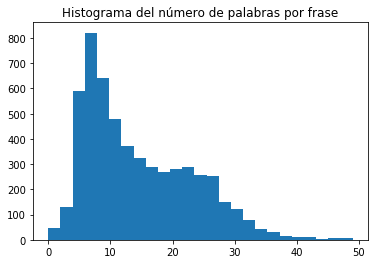

In [16]:
texts_lengths = [len(x.split()) for x in texts]
texts_lengths = [x for x in texts_lengths if x < 50]
plt.hist(texts_lengths, bins=25)
plt.title("Histograma del número de palabras por frase")
plt.show()

In [17]:
sentence_size = 40
min_word_freq = 3

In [18]:
vocab_processor = learn.preprocessing.VocabularyProcessor(sentence_size, min_frequency=min_word_freq)
vocab_processor.fit_transform(texts)
transformed_texts = np.array([x for x in vocab_processor.transform(texts)])
embedding_size = len(np.unique(transformed_texts))

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [19]:
embedding_size

2108

In [20]:
transformed_texts

array([[  44,  455,    0, ...,    0,    0,    0],
       [  47,  315, 1440, ...,    0,    0,    0],
       [  46,  465,    9, ...,    0,    0,    0],
       ...,
       [   0,   59,    9, ...,    0,    0,    0],
       [   5,  493,  108, ...,    0,    0,    0],
       [   0,   40,  474, ...,    0,    0,    0]])

In [21]:
texts

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only',
 'had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call the mobil

In [22]:
train_idx = np.random.choice(len(texts), round(len(texts)*0.8), replace=False)
test_idx = np.array(list(set(range(len(texts)))-set(train_idx)))

texts_train = [x for ix, x in enumerate(texts) if ix in train_idx]
texts_test = [x for ix, x in enumerate(texts) if ix in test_idx]
target_train = [x for ix, x in enumerate(target) if ix in train_idx ]
target_test = [x for ix, x in enumerate(target) if ix in test_idx]

In [23]:
identity_matrix = tf.diag(tf.ones(shape = [embedding_size]))

In [24]:
A = tf.Variable(tf.random_normal(shape=[embedding_size,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [25]:
x_data = tf.placeholder(shape=[sentence_size], dtype=tf.int32)
y_target = tf.placeholder(shape = [1,1], dtype = tf.float32)

In [26]:
x_embed = tf.nn.embedding_lookup(identity_matrix, x_data)
x_col_sums = tf.reduce_sum(x_embed,0)

In [27]:
x_col_sum_2D = tf.expand_dims(x_col_sums,0)
model_output = tf.add(tf.matmul(x_col_sum_2D, A), b)

In [28]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [29]:
prediction = tf.sigmoid(model_output)

In [30]:
my_optim = tf.train.GradientDescentOptimizer(0.001)
train_step = my_optim.minimize(loss)

In [32]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [35]:
loss_vect = []
train_acc_all = []
train_acc_avg = []
for ix, t in enumerate(vocab_processor.fit_transform(texts_train)):
    y_data = [[target_train[ix]]]
    session.run(train_step, feed_dict={x_data:t, y_target:y_data})
    
    temp_loss = session.run(loss, feed_dict={x_data:t, y_target:y_data})
    loss_vect.append(temp_loss)
    
    if(ix+1)%10==0:
        print("Observación de entrenamiento #{}, Perdidas = {}".format(ix+1, temp_loss))
    
    [[temp_pred]] = session.run(prediction, feed_dict={x_data:t, y_target:y_data})
    train_acc_temp = target_train[ix]==np.round(temp_pred)
    train_acc_all.append(train_acc_temp)
    if len(train_acc_all)>=50:
        train_acc_avg.append(np.mean(train_acc_all[-50:]))
        train_acc_all = []

Observación de entrenamiento #10, Perdidas = 21.986482620239258
Observación de entrenamiento #20, Perdidas = 9.564954731033914e-12
Observación de entrenamiento #30, Perdidas = 1.81340983544942e-05
Observación de entrenamiento #40, Perdidas = 15.18665599822998
Observación de entrenamiento #50, Perdidas = 20.03030776977539
Observación de entrenamiento #60, Perdidas = 8.022704028887162e-11
Observación de entrenamiento #70, Perdidas = 5.0905153329949826e-05
Observación de entrenamiento #80, Perdidas = 2.925331418074384e-12
Observación de entrenamiento #90, Perdidas = 0.03616680949926376
Observación de entrenamiento #100, Perdidas = 7.121312428637339e-09
Observación de entrenamiento #110, Perdidas = 1.1468863487243652
Observación de entrenamiento #120, Perdidas = 3.4488930396037176e-06
Observación de entrenamiento #130, Perdidas = 4.5429342208080925e-06
Observación de entrenamiento #140, Perdidas = 6.1072586987620525e-09
Observación de entrenamiento #150, Perdidas = 0.0001702585577731952
Ob

Observación de entrenamiento #1250, Perdidas = 0.01079816184937954
Observación de entrenamiento #1260, Perdidas = 7.1799918259785045e-06
Observación de entrenamiento #1270, Perdidas = 0.0004468399565666914
Observación de entrenamiento #1280, Perdidas = 8.606990741100162e-05
Observación de entrenamiento #1290, Perdidas = 1.8573604822158813
Observación de entrenamiento #1300, Perdidas = 0.000808144046459347
Observación de entrenamiento #1310, Perdidas = 9.056074486579746e-05
Observación de entrenamiento #1320, Perdidas = 0.1562984138727188
Observación de entrenamiento #1330, Perdidas = 0.00010285377356922254
Observación de entrenamiento #1340, Perdidas = 8.7623291015625
Observación de entrenamiento #1350, Perdidas = 0.01522431056946516
Observación de entrenamiento #1360, Perdidas = 7.062910299282521e-05
Observación de entrenamiento #1370, Perdidas = 0.0006490081432275474
Observación de entrenamiento #1380, Perdidas = 1.2133690118789673
Observación de entrenamiento #1390, Perdidas = 4.050

Observación de entrenamiento #2490, Perdidas = 0.005721045657992363
Observación de entrenamiento #2500, Perdidas = 0.004100548569113016
Observación de entrenamiento #2510, Perdidas = 0.009174630977213383
Observación de entrenamiento #2520, Perdidas = 0.39888834953308105
Observación de entrenamiento #2530, Perdidas = 0.0003535415162332356
Observación de entrenamiento #2540, Perdidas = 0.0002741337229963392
Observación de entrenamiento #2550, Perdidas = 8.057106971740723
Observación de entrenamiento #2560, Perdidas = 1.401602162331983e-06
Observación de entrenamiento #2570, Perdidas = 0.0002384232502663508
Observación de entrenamiento #2580, Perdidas = 0.002573429374024272
Observación de entrenamiento #2590, Perdidas = 4.203543186187744
Observación de entrenamiento #2600, Perdidas = 0.5822953581809998
Observación de entrenamiento #2610, Perdidas = 0.09670788049697876
Observación de entrenamiento #2620, Perdidas = 0.05041393265128136
Observación de entrenamiento #2630, Perdidas = 0.050066

Observación de entrenamiento #3720, Perdidas = 0.00139078579377383
Observación de entrenamiento #3730, Perdidas = 1.7687746286392212
Observación de entrenamiento #3740, Perdidas = 0.00024621994816698134
Observación de entrenamiento #3750, Perdidas = 0.3552488088607788
Observación de entrenamiento #3760, Perdidas = 0.007823229767382145
Observación de entrenamiento #3770, Perdidas = 0.00137392058968544
Observación de entrenamiento #3780, Perdidas = 0.000480135582620278
Observación de entrenamiento #3790, Perdidas = 0.000123102348879911
Observación de entrenamiento #3800, Perdidas = 0.09371021389961243
Observación de entrenamiento #3810, Perdidas = 0.019712254405021667
Observación de entrenamiento #3820, Perdidas = 0.0006350911571644247
Observación de entrenamiento #3830, Perdidas = 0.001131405238993466
Observación de entrenamiento #3840, Perdidas = 0.028498411178588867
Observación de entrenamiento #3850, Perdidas = 2.7645872251014225e-05
Observación de entrenamiento #3860, Perdidas = 0.0

In [36]:
train_acc_all

[True, True, True, True, True, False, True, True, False]

(0, 1)

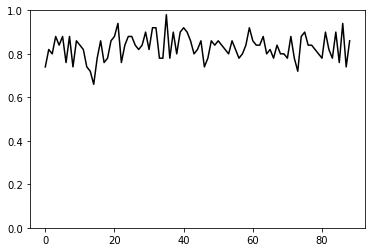

In [40]:
plt.plot(train_acc_avg, 'k-', label='Precisión')
plt.ylim([0,1])

In [45]:
test_acc_all = []
test_acc_avg = []
for ix, t in enumerate(vocab_processor.fit_transform(texts_test)):
    y_data = [[target_test[ix]]]
    
  
    
    [[temp_pred]] = session.run(prediction, feed_dict={x_data:t, y_target:y_data})
    test_acc_temp = target_test[ix]==np.round(temp_pred)
    test_acc_all.append(test_acc_temp)
    if len(test_acc_all)>=50:
        test_acc_avg.append(np.mean(test_acc_all[-50:]))
        test_acc_all = []
    
    if(ix+1)%50==0:
        print("Observación de entrenamiento #{}".format(ix+1))
        print("Frase: {}".format(t))
        print("Es {} y la predicción dice: {}".format(y_data, temp_pred))

Observación de entrenamiento #50
Frase: [ 567    2 2033  321  900   23   30  300    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Es [[0]] y la predicción dice: 0.0030022712890058756
Observación de entrenamiento #100
Frase: [ 27   5 307   0  84  66  33   3  28   0  41 106   0   7  67   1 128   5
  92   0   4 243   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
Es [[0]] y la predicción dice: 0.8317581415176392
Observación de entrenamiento #150
Frase: [153  55  32  66 192   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
Es [[0]] y la predicción dice: 0.0010896516032516956
Observación de entrenamiento #200
Frase: [ 207    6   53  109  427   86  669  214  186    3  102  313  118   16
   21   49   34   32 1692  330  235  344    0    0    0    0    0    0
    0  

In [42]:
print("Eficacia de predicción globale en test {}".format(np.mean(test_acc_all)))

Eficacia de predicción globale en test 0.8


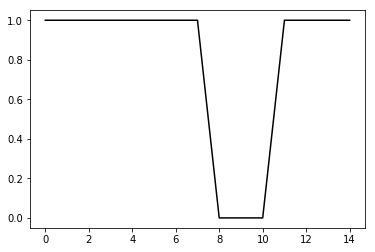

In [43]:
plt.plot(test_acc_all, 'k-', label = "Eficacia en la predicción")